In [113]:
import numpy as np 
import pandas as pd

import os
for dirname, _, filenames in os.walk('C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\house_prices_project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\אריאל נושאי לימוד\מבוא למדעי הנתונים\KAGGLE\house_prices_project\kc_house_data.csv


In [230]:
df = pd.read_csv("C:/אריאל נושאי לימוד/מבוא למדעי הנתונים/KAGGLE/house_prices_project/kc_house_data.csv")
df.drop('date', axis=1, inplace=True)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,1987


# Features

#### id - Unique ID for each home sold.

#### date - Date of the home sale.

#### price - Price of each home sold.

#### bedrooms - Number of bedrooms.

#### bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower.

#### sqft_living - Square footage of the apartments interior living space.

#### sqft_lot - Square footage of the land space.

#### floors - Number of floors.

#### waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not.

#### view - An index from 0 to 4 of how good the view of the property was.

#### condition - An index from 1 to 5 on the condition of the apartment.

#### grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

#### yr_built - The year the house was initially built.

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21613 non-null  int64  
 1   date         21613 non-null  object 
 2   price        21613 non-null  float64
 3   bedrooms     21613 non-null  int64  
 4   bathrooms    21613 non-null  float64
 5   sqft_living  21613 non-null  int64  
 6   sqft_lot     21613 non-null  int64  
 7   floors       21613 non-null  float64
 8   waterfront   21613 non-null  int64  
 9   view         21613 non-null  int64  
 10  condition    21613 non-null  int64  
 11  yr_built     21613 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 2.0+ MB


In [116]:
df.isnull().sum()

id             0
date           0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
view           0
condition      0
yr_built       0
dtype: int64

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

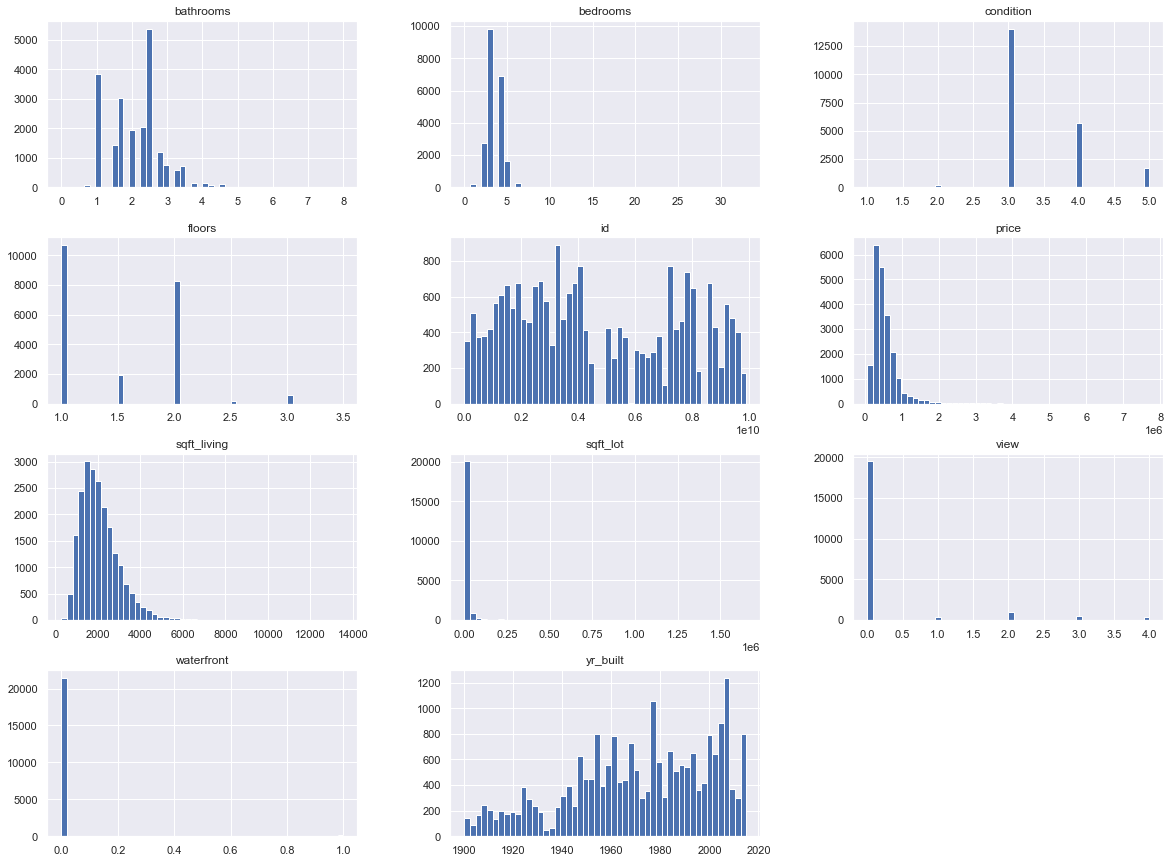

In [118]:
df.hist(bins=50,figsize=(20,15))
plt.show()

## waterfront

In [119]:
df.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [120]:
df.groupby(df.waterfront).price.mean()

waterfront
0    5.316534e+05
1    1.662524e+06
Name: price, dtype: float64

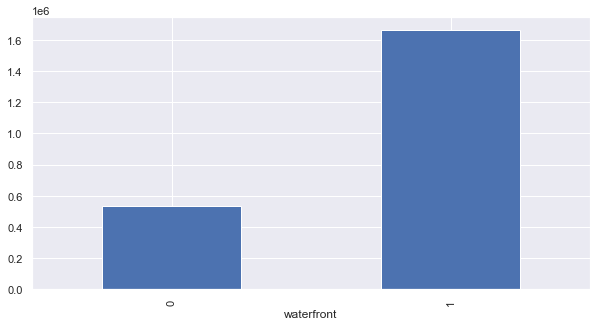

In [121]:
price_by_wf = df.groupby(df.waterfront).price.mean()
price_by_wf.plot(kind='bar',stacked=True ,figsize=(10,5))

a house is either overlooking a waterfront or not, on average a house overlooking a waterfront is worth a million dollars more than a house that's not

## view

In [122]:
df.view.value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

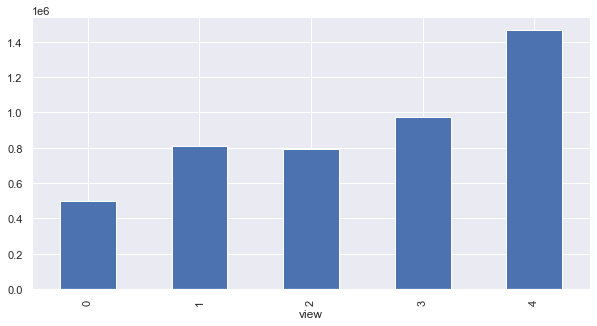

In [123]:
price_by_view = df.groupby(df.view).price.mean()
price_by_view.plot(kind='bar',stacked=True ,figsize=(10,5))

despite the view varible being between 0 and 4 depending on how good it is, the mean price of houses with view value 1 is higher than houses with the view value 2

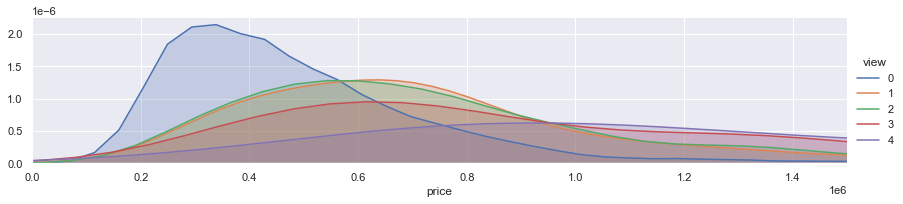

In [124]:
facet = sns.FacetGrid(df, hue="view",aspect=4)
facet.map(sns.kdeplot,'price',shade= True)
facet.set(xlim=(0, df['price'].max()))
facet.add_legend()
plt.xlim(0,1500000)
plt.show()

### another way to look at the price spread for each view value

## floors

In [125]:
df.floors.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [126]:
price_by_floors = df.groupby(df.floors).price.mean()
price_by_floors

floors
1.0    4.422196e+05
1.5    5.590449e+05
2.0    6.490515e+05
2.5    1.061021e+06
3.0    5.826201e+05
3.5    9.339375e+05
Name: price, dtype: float64

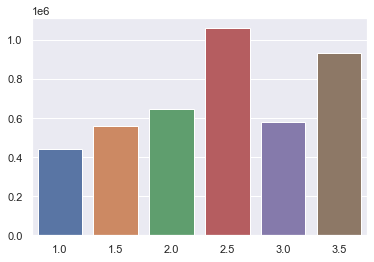

In [127]:
floors = [1,1.5,2,2.5,3,3.5]
mean_price = []
for f in floors:
    mean_price.append(price_by_floors[f])
sns.barplot(floors,mean_price)

## condition

In [128]:
df.condition.value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [133]:
price_by_condition = df.groupby(df.condition).price.mean()
price_by_condition_ = df.groupby(df.condition).price.median()

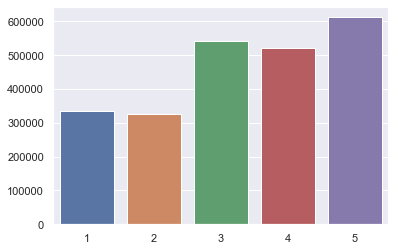

In [138]:
conditions = [1,2,3,4,5]
mean_price_conditions = []
median_price_conditions = []
for c in conditions:
    mean_price_conditions.append(price_by_condition[c])
    median_price_conditions.append(price_by_condition_[c])
sns.barplot(conditions,mean_price_conditions)

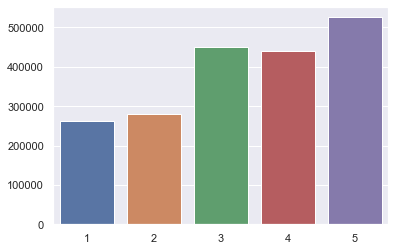

In [139]:
sns.barplot(conditions,median_price_conditions)

## year built

In [140]:
df.yr_built.value_counts()

2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

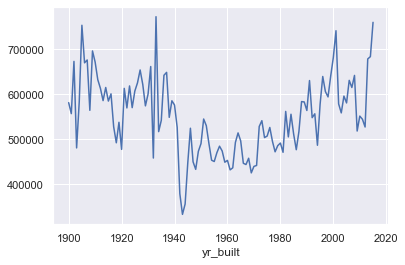

In [151]:
price_by_year_built = df.groupby(df.yr_built).price.mean()
price_by_year_built.plot()

## bedrooms

In [158]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

let's remove the house with 33 bedrooms 

In [153]:
df = df[df.bedrooms != 33]

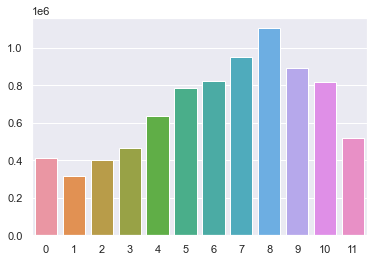

In [159]:
price_by_bedrooms = df.groupby(df.bedrooms).price.mean()

bedroom_count = np.arange(12)

mean_price_by_bedrooms = []

for b in bedroom_count:
    mean_price_by_bedrooms.append(price_by_bedrooms[b])
    
sns.barplot(bedroom_count, mean_price_by_bedrooms)

## bathrooms

In [166]:
df.bathrooms.value_counts()

2.50    5380
1.00    3852
1.75    3047
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [183]:
bathroom_count = np.sort(df.bathrooms.unique())
bathroom_count

array([0.  , 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75,
       3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 ,
       5.75, 6.  , 6.25, 6.5 , 6.75, 7.5 , 7.75, 8.  ])

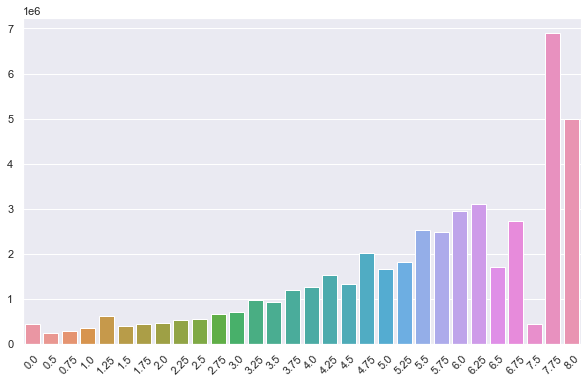

In [196]:
price_by_bathrooms = df.groupby(df.bathrooms).price.mean()

mean_price_by_bathrooms = []

for b in bathroom_count:
    mean_price_by_bathrooms.append(price_by_bathrooms[b])

fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)    
    
graph = sns.barplot(bathroom_count, mean_price_by_bathrooms, ax=ax)
for item in graph.get_xticklabels():
    item.set_rotation(45)

## sqft_living

In [218]:
print(df.sqft_living.max())
print(df.sqft_living.min())

13540
290


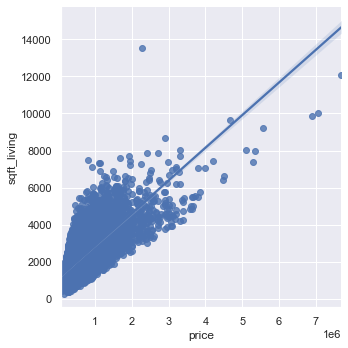

In [206]:
sns.lmplot(x='price',y='sqft_living',data=df)

## sqft_lot

In [220]:
print(df.sqft_lot.max())
print(df.sqft_lot.min())

1651359
520


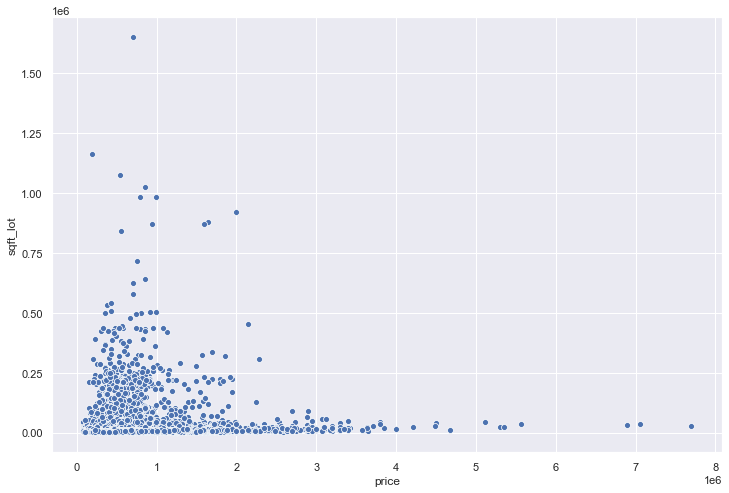

In [227]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='sqft_lot',data=df)

In [222]:
af = df[df.sqft_lot > 1600000]
af

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,yr_built
1719,1020069017,20150327T000000,700000.0,4,1.0,1300,1651359,1.0,0,3,4,1920


## correlation matrix

#### let's use the correlation matrix to see the correlation between each feture and the price 

In [228]:
corr_matrix = df.corr()
corr_matrix["price"].sort_values(ascending=False)

price          1.000000
sqft_living    0.702055
bathrooms      0.525144
view           0.397352
bedrooms       0.315434
waterfront     0.266332
floors         0.256803
sqft_lot       0.089658
yr_built       0.053993
condition      0.036366
id            -0.016788
Name: price, dtype: float64

#### in the future will try to create new features based on current features to try and find some strong correlations(total num of rooms, rooms compared to living space)

# models

In [238]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

data = df.drop("price",axis=1).values
prices = df["price"].values 

X_train, X_test, y_train, y_test = train_test_split(data, prices, test_size = 0.40, random_state=0)

lin_reg.fit(X_train,y_train)

y_test_pred = lin_reg.predict(X_test)

In [239]:
import sklearn.metrics as sm
print("Mean absolute error =", sm.mean_absolute_error(y_test, y_test_pred))
print("Mean squared error =", sm.mean_squared_error(y_test, y_test_pred))
print("Median absolute error =", sm.median_absolute_error(y_test, y_test_pred))
print("Explain variance score =", sm.explained_variance_score(y_test, y_test_pred))
print("R2 score =", sm.r2_score(y_test, y_test_pred))

Mean absolute error = 153128.07574302086
Mean squared error = 57440065573.555824
Median absolute error = 108818.86552940356
Explain variance score = 0.6011294547680123
R2 score = 0.6011051502624976
